In [1]:
import os
os.chdir("/y/home/zyw/tmp/DeepPurpose/")

In [9]:
from scripts import utils,dataset,DTI

In [3]:
X_drug, X_target, y = dataset.load_process_DAVIS('./data/', binary=False)

Beginning Processing...
Default set to logspace (nM -> p) for easier regression
Done!


In [4]:
drug_encoding = 'Morgan'
target_encoding = 'CNN'

In [5]:
train, val, test = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method = 'random', frac = [0.7,0.1,0.2], random_seed = 1)

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


In [6]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12])

In [7]:
model = DTI.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.5772. Total time 0.00027 hours
Validation at Epoch 1 with loss:0.61984, MSE: 0.64104 , Pearson Correlation: 0.46699 with p-value: 1.05037 , Concordance Index: 0.76022
Training at Epoch 2 iteration 0 with loss 0.85355. Total time 0.02611 hours
Validation at Epoch 2 with loss:0.56762, MSE: 0.67678 , Pearson Correlation: 0.51402 with p-value: 2.01010 , Concordance Index: 0.77554
Training at Epoch 3 iteration 0 with loss 0.61859. Total time 0.055 hours
Validation at Epoch 3 with loss:0.65787, MSE: 0.58688 , Pearson Correlation: 0.56183 with p-value: 9.84609 , Concordance Index: 0.78963
Training at Epoch 4 iteration 0 with loss 0.52977. Total time 0.08444 hours
Validation at Epoch 4 with loss:0.67572, MSE: 0.56019 , Pearson Correlation: 0.57974 with p-value: 1.55375 , Concordance Index: 0.79616
Training at Epoch 5 iteration 0 with loss 0.37932. Total time 0.11416 hours
Validation a

Training at Epoch 40 iteration 0 with loss 0.24394. Total time 1.10861 hours
Validation at Epoch 40 with loss:0.34532, MSE: 0.32113 , Pearson Correlation: 0.79486 with p-value: 0.0 , Concordance Index: 0.87698
Training at Epoch 41 iteration 0 with loss 0.27846. Total time 1.13861 hours
Validation at Epoch 41 with loss:0.18135, MSE: 0.30275 , Pearson Correlation: 0.79726 with p-value: 0.0 , Concordance Index: 0.86874
Training at Epoch 42 iteration 0 with loss 0.22662. Total time 1.16777 hours
Validation at Epoch 42 with loss:0.36873, MSE: 0.37522 , Pearson Correlation: 0.79963 with p-value: 0.0 , Concordance Index: 0.86668
Training at Epoch 43 iteration 0 with loss 0.41753. Total time 1.19666 hours
Validation at Epoch 43 with loss:0.21107, MSE: 0.28169 , Pearson Correlation: 0.80870 with p-value: 0.0 , Concordance Index: 0.87172
Training at Epoch 44 iteration 0 with loss 0.23049. Total time 1.22472 hours
Validation at Epoch 44 with loss:0.34255, MSE: 0.34390 , Pearson Correlation: 0.794

Validation at Epoch 79 with loss:0.20038, MSE: 0.24204 , Pearson Correlation: 0.83847 with p-value: 0.0 , Concordance Index: 0.88878
Training at Epoch 80 iteration 0 with loss 0.17624. Total time 2.24861 hours
Validation at Epoch 80 with loss:0.23759, MSE: 0.24714 , Pearson Correlation: 0.83514 with p-value: 0.0 , Concordance Index: 0.88558
Training at Epoch 81 iteration 0 with loss 0.15471. Total time 2.27777 hours
Validation at Epoch 81 with loss:0.23001, MSE: 0.26212 , Pearson Correlation: 0.83754 with p-value: 0.0 , Concordance Index: 0.89090
Training at Epoch 82 iteration 0 with loss 0.14453. Total time 2.3025 hours
Validation at Epoch 82 with loss:0.26666, MSE: 0.23368 , Pearson Correlation: 0.84562 with p-value: 0.0 , Concordance Index: 0.89439
Training at Epoch 83 iteration 0 with loss 0.11473. Total time 2.33222 hours
Validation at Epoch 83 with loss:0.21050, MSE: 0.23985 , Pearson Correlation: 0.84189 with p-value: 0.0 , Concordance Index: 0.89141
Training at Epoch 84 iterati

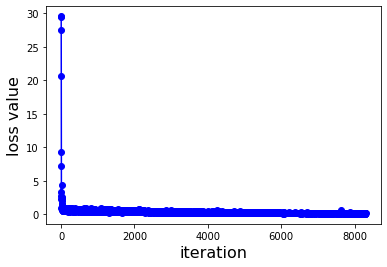

In [8]:
model.train(train, val, test)

In [10]:
model.save_model('./save_model/model_Morgan_CNN_Davis')